In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

In [1]:
import sklearn as sk

In [6]:
def rk1_sys(f,time,initial,h):   
    points=np.arange(time[0],time[1]+h,h)
    n=len(points)
    sol=np.zeros(n)
    sol[0]=initial
    for i in range(1,n):
        
        sol[i]=sol[i-1]+h*f.subs({t:points[i-1],y:sol[i-1]})
    return sol

In [7]:
def rk2(f,time,initial,h):
    points=np.arange(time[0],time[1]+h,h)
    n=len(points)
    sol=np.zeros(n)
    sol[0]=initial
    for i in range(1,n):
        k1=f.subs({t:points[i-1],y:sol[i-1]})
        k2=f.subs({t:points[i],y:sol[i-1]+h*k1})
        sol[i]=sol[i-1]+h*(k1+k2)/2
        return sol
    

In [8]:
def rk4(f,time,initial,h):
    points=np.arange(time[0],time[1]+h,h)
    n=len(points)
    sol=np.zeros(n)
    sol[0]=initial
    for i in range(1,n):
        k1=f.subs({t:points[i-1],y:sol[i-1]})
        k2=f.subs({t:points[i-1]+h/2,y:sol[i-1]+h*k1/2})
        k3=f.subs({t:points[i-1]+h/2,y:sol[i-1]+h*k2/2})
        k4=f.subs({t:points[i],y:sol[i-1]+h*k3})
        sol[i]=sol[i-1]+h*((k1*1/6)+(k2*1/3)+(k3*1/3)+(k4*1/6))
        return sol

In [1]:
from scipy.integrate import solve_ivp

In [13]:
t=sp.Symbol("t")
ode_fn=lambda t,y:sp.sin(t)+3*sp.cos(2*t)-y
t_begin=0
t_end=10
exact_sol=(1/2)*sp.sin(t)-(1/2)*sp.cos(t)+(3/5)*sp.cos(2*t)+(6/5)*sp.sin(2*t)-(1/10)*sp.exp(-t)
exact_sol_nm=sp.lambdify(t,exact_sol,modules="numpy")
y_init=exact_sol.subs({t:0})
num_sol=solve_ivp(ode_fn,[t_begin,t_end],[y_init],method="RK45",t_eval=None)
num_sol.t, num_sol.y               #matrix with 1 row
exact_sol_nm(num_sol.t)

array([-2.77555756e-17,  2.99989998e-04,  3.29878778e-03,  3.31745164e-02,
        3.18733768e-01,  7.83834268e-01, -4.19379561e-01, -4.60078998e-01,
        1.07790310e+00,  1.28994895e+00, -8.03218602e-01, -2.02167125e+00,
       -3.84202114e-01,  1.20910758e+00,  2.62266299e-01, -6.45853521e-01,
        4.65138693e-01,  1.54689095e+00,  1.48790421e+00])

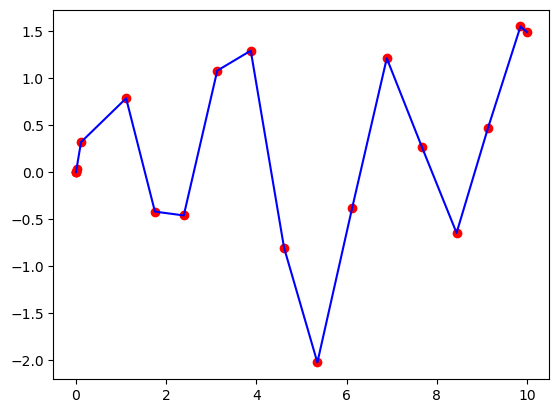

In [15]:
fig,ax=plt.subplots()
ax.plot(num_sol.t,exact_sol_nm(num_sol.t),color="blue",label="Exact sol")
ax.scatter(num_sol.t,num_sol.y[0],color="red",label="Numerical Sol")

In [ ]:
ode_fn_sys=lambda t,y:[t**2*y[1],-t*y[0]]
t_begin=0
t_end=10
y_init_sys=[1,1]
num_sol_sys=solve_ivp(ode_fn_)